In [1]:
import sympy as sym
import numpy as np
import time
import cloudpickle
import matplotlib.pyplot as plt
import matplotlib.animation as ani
plt.style.use(['fivethirtyeight','seaborn-deep'])
from IPython.display import HTML

m = [0]*3

with open("Feasible_Solution/damp_x3/steady-state.pkl", "rb") as f:
    m[1] = cloudpickle.load(f)
    
with open("Feasible_Solution/damp_x3/accel.pkl", "rb") as f:
    m[0] = cloudpickle.load(f)
    
with open("Feasible_Solution/damp_x3/decel.pkl", "rb") as f:
    m[2] = cloudpickle.load(f)
    
N = m[0].N[-1]

cN = m[0].cN[-1]

In [2]:
pub_time = 10/1000
run_time = 0


N = m[0].N[-1]
cN = m[0].cN[-1]

adder = 0
x = []
z = []
theta_l_L = []
r_L = []
theta_l_R = []
r_R = []
solenoid_R = []
solenoid_L = []
ass = []
ass2 = []

time = []
run_time = 0
N_time = []
cN_time = []
N_adder = 0
cN_adder = 0
position_cN = 0
position_N = 0

x_tmp = []
z_tmp = []
theta_l_L_tmp = []
r_L_tmp = []
theta_l_R_tmp = []
r_R_tmp = []
F_bang_L = []
F_bang_R = []

def interpolate(y_inter, cur_time, x_inter, position):
    # y_inter = data
    # x_inter = time
    ans = 0
    for i in range(position, len(x_inter)):
        if(x_inter[i]<=cur_time and cur_time<x_inter[i+1]):
            position = i
            ans = y_inter[i] + (cur_time - x_inter[i])*(y_inter[i+1] - y_inter[i])/(x_inter[i+1] - x_inter[i])
            return ans, position

        
for i in range(0, 3):
    if(i>0):
        adder += m[i-1].q[N,cN,'x'].value
        cN_adder += (m[i-1].tt0[N].value - m[i-1].tt0[1].value)
        N_adder += (m[i-1].tt0[N].value - m[i-1].tt0[1].value)
    for n in range(1, N+1):
        F_bang_R.append(m[i].Fbang_pos_R[n].value - m[i].Fbang_neg_R[n].value*100)
        F_bang_L.append(m[i].Fbang_pos_L[n].value - m[i].Fbang_neg_L[n].value*100)
        N_time.append(m[i].tt0[n].value - m[i].tt0[1].value + N_adder)
        for c in range(1, cN+1):
            cN_time.append(m[i].tt[n,c].value - m[i].tt[1,1].value + cN_adder)
            x_tmp.append(m[i].q[n,c,'x'].value + adder)
            z_tmp.append(m[i].q[n,c,'z'].value)
            theta_l_L_tmp.append(m[i].q[n,c,'theta_l_L'].value)
            r_L_tmp.append(m[i].q[n,c,'r_L'].value)
            theta_l_R_tmp.append(m[i].q[n,c,'theta_l_R'].value)
            r_R_tmp.append(m[i].q[n,c,'r_R'].value)

while 1:
    if(run_time>N_time[-1]):
        break
        
    tmp, position_cN = interpolate(theta_l_R_tmp, run_time, cN_time, position_cN)
    theta_l_R.append(tmp)
    
    tmp, position_cN = interpolate(theta_l_L_tmp, run_time, cN_time, position_cN)
    theta_l_L.append(tmp)
    
    tmp, position_cN = interpolate(z_tmp, run_time, cN_time, position_cN)
    z.append(tmp)

    tmp, position_N = interpolate(F_bang_R, run_time, N_time, position_N)
    ass.append(tmp)
    if tmp > 0.1:
        solenoid_R.append(np.ceil(tmp))
    elif tmp < -0.1:
        solenoid_R.append(np.floor(tmp))   
    else:
        solenoid_R.append(np.round(tmp))
    tmp, position_N = interpolate(F_bang_L, run_time, N_time, position_N)
    ass2.append(tmp)
    if tmp > 0.1:
        solenoid_L.append(np.ceil(tmp))
    elif tmp < -0.1:
        solenoid_L.append(np.floor(tmp))   
    else:
        solenoid_L.append(np.round(tmp))
    
    run_time += pub_time
    time.append(run_time)
    
print('done')

done


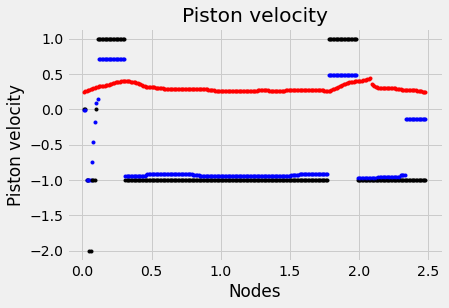

In [3]:
# servo stuff

R = []
L = []
adder = 0
for i in range(0, 3):
    for n in range(1, N+1):
        for c in range(1, cN+1):
            R.append(m[i].dq[n,c,'r_R'].value)
            L.append(m[i].dq[n,c,'r_L'].value)

plt.axes()
plt.grid(True)
for n in range (0,len(z)):
    plt.plot(time[n], z[n], 'k.', c='red')
    
    plt.plot(time[n], solenoid_R[n], 'k.', c='black')
    plt.plot(time[n], ass[n], 'k.', c='blue')
    plt.xlabel('Nodes')
    plt.ylabel('Piston velocity')
    plt.title('Piston velocity')
plt.show()

# plt.axes()
# plt.grid(True)
# for n in range (0,len(z)):
#     plt.plot(time[n], z[n], 'k.', c='red')
#     plt.plot(time[n], solenoid_R[n], 'k.', c='black')
#     plt.plot(time[n], ass[n], 'k.', c='green')
#     plt.xlabel('Nodes')
#     plt.ylabel('Piston velocity')
#     plt.title('Piston velocity')
# plt.show()

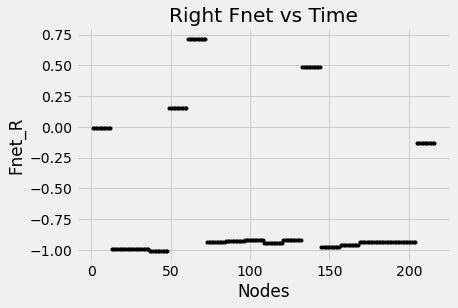

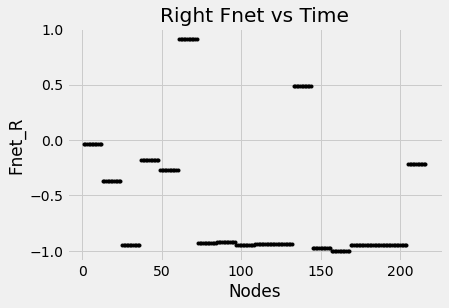

In [4]:
plt.axes()
plt.grid(True)
Time = 0
p = 0
for i in range(0, 3):
    for n in range (1,N+1):
        Fnet_R = (m[i].Fbang_pos_R[n].value - m[i].Fbang_neg_R[n].value*100)
        time = m[i].tt0[n].value
        p += 1
        plt.plot(p,Fnet_R,'k.')
        plt.xlabel('Nodes')
        plt.ylabel('Fnet_R')
        plt.title('Right Fnet vs Time')
plt.show()

plt.axes()
plt.grid(True)
Time = 0
p = 0
for i in range(0, 3):
    for n in range (1,N+1):
        Fnet_R = (m[i].Fbang_pos_L[n].value - m[i].Fbang_neg_L[n].value*100)
        time = m[i].tt0[n].value
        Time += time
        p += 1
        plt.plot(p,Fnet_R,'k.')
        plt.xlabel('Nodes')
        plt.ylabel('Fnet_R')
        plt.title('Right Fnet vs Time')
plt.show()

